
## 10-1. 들어가며

## 들어가며

지난 시간에는 보험 사기를 예측하기 위해 사고 네트워크 피쳐와 주행 패턴 피쳐들을 뽑아 보았습니다.

보험 사기 문제 특징 중 하나가 일반사고인지 보험사기인지 명확하게 밝혀지지 않은 데이터가 많다는 것이 특징이였습니다. 보통 실제 데이터에서는 사고가 일어나면 95%정도가 일반 사고이고, 나머지 5%정도가 보험사기 인데요. 일반 사고 중에서도 보험사기가 섞여 있을 수 있는 레이블이 불명확한 경우가 훨씬 많기 때문에 이러한 한계를 극복할 수 있는 기법들을 잘 고민하는 것이 중요합니다.

레이블이 불명확한 경우 비지도 학습으로 푸는 경우가 많은데요. 이번 시간에는 비지도 학습으로 풀어보고 imbalanced data를 어떻게 다뤄야하는지 그리고 semi supervised learning이 무엇인지에 대해서 배워보는 시간을 가져보겠습니다.

## 학습목표

___

-   클러스터링에 대해 이해하고 클러스터링으로 이상 탐지해본다.
-   Imbalanced data에 대해 살펴보고 지도학습기반으로 탐지한다.
-   Semi-supervised learning으로 이상 탐지해본다.

### 준비물

___

`cloud shell` 에서 아래 명령어를 입력 해 주세요

```
$ ln -s ~/data/* ~/aiffel/insurance_fraud/data/
```

## 10-2. 다양한 이상 탐지 기법
Fraud Detection System(FDS)와 유사한 Anomaly Detection모델을 여러가지 방법으로 풀 수 있다고 하는데요. 아래 영상을 보고 퀴즈에 답해봅시다.

**Deep Learning Model for Anomaly Detection: Survey**

[Deep Learning Model for Anomaly Detection: Survey](https://youtu.be/wSgnhxZ3iQo)

Q1. 위 영상을 보고 답해봅시다! Anomaly Detection모델을 학습하는데 있어서, 지도학습/반지도학습/비지도학습의 방법등으로 풀 수 있다. 그 중 반지도 학습의 장점은 뭐라고 할 수 있을까? (3분 15초)

예시답안

현실적으로 모든 데이터셋에 대한 레이블은 확보할 수 없기 때문에 현실적인 경우를 가정함. 비지도 학습에 비해 모델의 성능이 보장됩니다.

**Semi supervised Learning - Overview**

[Semi Supervised Learning - Overview](https://www.youtube.com/embed/vhitW3gsuhw)

Q2. Semi supervised learning 의 가정 중 Cluster Assumption 이란 무엇이고, 왜 중요하다고 할 수 있을까요? (21분 50초)

예시답안

Cluster Assumption은 데이터 포인트들이 클러스터를 이루고, 같은 클러스터의 데이터 포인트는 같은 클래스의 레이블을 지닌다는 가정입니다.

해당 가정이 중요한 이유는 유니폼하게 분포된 (Uniformly distributed) 데이터의 경우는 결정 경계면을 찾는데 Unlabeled data 가 도움이 될 수 없기 때문입니다.

## 10-3. 클러스터링 기반의 이상 탐지

지난 시간에서 보험 사기 특징 중 하나가 일반사고인지 보험사기인지 명확하게 밝혀지지 않은 데이터들이 많다는 것이 특징이였습니다. 일반사고 중에서도 보험사기가 섞여있을 수 있는 레이블이 불명확한 경우가 많기 때문에 이러한 한계를 극복할 수 있는 기법들을 잘 고민하는 것이 필요한데요. 그래서 이번 스텝에서는 unlabeled 데이터에서 많이 쓰이고 있는 비지도학습 중에서도 클러스터링 기반으로 이상치를 탐지해보도록 하겠습니다.

## 클러스터링이란?

___

클러스터링이란 어떤 데이터가 주어졌을 때, 점들간의 거리를 이용하여 몇 개의 클러스터로 그룹화를 해야합니다.

1.  하나의 군집에 있는 각 데이터 포인트가 서로 비슷하고, 서로 가까워야(유사해야)하고
2.  다른 군집에 있는 데이터와는 다르게, 거리가 멀게(유사하지 않게) 데이터를 분류해주는 작업입니다.

그룹 내 차이를 줄이고, 그룹간 차이는 최대화하도록 하여 구현되는 것이 일반적입니다. 즉 비지도학습(Unsupervised Learning)에 해당이 되는데요. 레이블이 없는 데이터들을 다룰 때 이 비지도학습을 많이 사용합니다. 보통 유사도는 거리의 척도를 이용해서 정의가 됩니다. 아웃라이어(Outlier)는 어느 클러스터에도 속하지 못하는 점으로 탐지하기가 쉽지 않습니다.

클러스터링 방법에는 크게 2가지 유형이 있습니다.

1.  비 계층적 군집분석(Non-Hierarchical Clustering)
2.  계층적 군집분석(Hierarchical Clustering)

비 계층적 군집분석에는 중심기반(Center-based)으로 분석하는 K-means와 밀도기반(Density-based)으로 분석하는 DBSCAN가 있습니다. 우리는 비 계층적 군집분석에서 중심기반으로 분석하는 K-mean로 이상치를 탐지해보겠습니다. 그렇다면 k-means에 대해 더 알아보아야겠죠?

## k-means란?

___

k-means는 중심기반 클러스터링 방법으로 **유사한 데이터는 중심점을 기반으로 분포할 것이다** 라는 가정을 기반으로 하게 됩니다. 여기서 **k는 클러스터의 개수** 를 의미합니다. n개의 데이터와 k(<=n)개의 중심점(centroid)이 주어졌을 때, 각 그룹 내의 데이터와 중심점 간의 비용(거리)을 최소화하는 방향으로 계속 업데이트 해줌으로써 그룹화를 수행하는 기법입니다. k-means알고리즘을 아래 그림으로 살펴봅시다.

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/kmeans1.max-800x600.png)

\[출처 : https://brilliant.org/wiki/k-means-clustering/\]

k-means알고리즘은 아래와 같은 방법으로 수행이됩니다. 일단, 유클리디안 공간이나 거리를 가정하고, 클러스터 갯수 k를 선택합니다. 위의 그림에서는 k를 3으로 설정하고 시작합니다.

1.  초기점(k)을 설정합니다.
    -   k는 중심점이고, 묶일 그룹의 수와 같다.
2.  그룹(cluster)를 부여합니다.
    -   k개의 중심점(동그라미)과 개별 데이터(네모) 간의 거리를 측정한다.
    -   가장 가까운 중심점으로 데이터를 부여한다.
3.  중심점(centroid)를 업데이트합니다.
    -   할당된 데이터들의 평균값으로 새로운 중심점을 업데이트한다.
4.  최적화를 수행합니다.
    -   2, 3 번 작업을 반복적으로 수행한다.
    -   반복적으로 수행하다가 변화가 없을만한 iteration수를 지정하고 중단한다.

k-means 클러스터링에 대한 자세한 내용은 아래 사이트를 참고해주세요!

-   [k-menas 클러스터링이란?](https://www.saedsayad.com/clustering_kmeans.htm)

이제 본격적으로 클러스터링에 기반한 이상탐지 실습을 수행해보겠습니다!

In [5]:
import os
import numpy as np
import pandas as pd 
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

### 1\. 데이터셋 준비

___

지금부터는 실제 쏘카에서 사용하는 데이터를 가지고 실습을 진행해볼껀데요. 그 전에 데이터셋에 대해서 살펴보도록하겠습니다. 이 실습에서 사용하는 데이터셋들은 **차종에 대한 정보(소형, 경형, 준중형, 중형, 대형), 쉐어링타입이 왕복인지 편도인지, 나이 그룹정보와 누적사고 유/무여부, 법인인지 아닌지, 보험료 타입, 구독여부, 할인차량, 대여시간 시작시간, 대여시간, 사고시각, 동승자 등에 정보** 가 컬럼으로 구성되어있습니다.

-   `car_model_1~5`: 순서대로 차종의 소형, 경형, 준중형, 중형, 대형모델
-   `sharing_type`: 0이면 왕복 / 1이면 편도
-   `age_group 1~5`: 순서대로 20대초반, 중반, 후반, 30대, 40대로 그룹
-   `cum_acc_YN_1`: 1이면 누적사고가 있음 / 0이면 누적사고가 없음
-   `type_b2b_b2c_0`: 법인의 유형
-   `pf_type1~3`: 보험료의 유형
-   `socarpass`: 구독 여부
-   `socarsave`: 할인 차량 여부
-   `start_hour1~6`: 각각의 대여 시작 시각
-   `b_hour1~5`: 대여 시간
-   `acc_hour0~6`: 사고 시각
-   `oai_prsn_cnt_missing`: 동승자가 불분명한 경우
-   `oai_prsn_cnt0~5`: 동승자에 대한 정보

마지막으로 저번 시간에 우리가 사고 네트워크상 연루된 사람 수를 뽑아낸 피쳐(`network_feature_involved_cnt`)와 주행 패턴을 뽑아낸 피쳐로 가장 많이 머문 상위 3개의 h3에 머문 비율을 뜻하는 (`h3_feature_top3_share`)를 함께 사용합니다. 그리고 정답 레이블인 `is_fraud`까지 함께 구성 되어있습니다.

여기서 `df_v1`은 train set이고, `df_v4`는 test set입니다. 해당 데이터셋은 날짜 기준으로 뽑은 데이터입니다. 1, 2월의 데이터를 학습데이터로 넣어서, 7월 건들에 대해 예측 한다고 가정합니다. 즉, `df_v1`데이터는 1, 2월의 쏘카 데이터이고, `df_v4`는 7월의 쏘카 데이터입니다.

In [6]:
# 데이터셋 준비 
df_v1 = pd.read_csv(os.getenv('HOME')+'/aiffel/insurance_fraud/data/dataset_1_labeled_train.csv') #train
df_v4 = pd.read_csv(os.getenv('HOME')+'/aiffel/insurance_fraud/data/dataset_4_labeled_test.csv') #test

In [7]:
df_v1

,accident_id,created_at_date,car_model_1,car_model_2,car_model_3,car_model_4,car_model_5,sharing_type_0,sharing_type_1,age_group_1,...,total_acc_history_cnt_of_persons_5,acc_hitory_bool_by_0_null,acc_history_bool_by_0_0,acc_history_bool_by_0_1,accumulate_used_count,month,is_fraud,dataset,network,h3
0,1007811,2021-01-03,0,1,0,0,0,1,0,0,...,0,0,1,0,2,1,1,v1,0.0,0.63
1,1007691,2021-01-02,0,1,0,0,0,0,1,1,...,0,0,1,0,1,1,1,v1,1.0,0.56
2,1009501,2021-01-20,0,1,0,0,0,1,0,1,...,0,0,1,0,1,1,1,v1,0.0,0.45
3,1010149,2021-01-26,1,0,0,0,0,1,0,1,...,0,0,1,0,1,1,1,v1,1.0,0.37
4,1008972,2021-01-15,1,0,0,0,0,1,0,0,...,0,0,1,0,1,1,1,v1,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,1008392,2021-01-09,1,0,0,0,0,1,0,0,...,0,0,1,0,4,1,0,v1,1.0,0.66
4316,1008359,2021-01-08,0,1,0,0,0,1,0,0,...,0,0,1,0,4,1,0,v1,0.0,0.55
4317,1012413,2021-02-15,0,1,0,0,0,1,0,0,...,0,0,1,0,1,2,0,v1,1.0,0.66
4318,1013303,2021-02-22,0,1,0,0,0,0,1,0,...,0,0,1,0,1,2,0,v1,1.0,0.63


학습에 어떠한 영향도 주지 않는 컬럼인 `month, is_fraud, dataset, accident_id, created_at_data`들은 drop으로 삭제 시켜줍니다. 이 컬럼들은 사고자의 정보가 아닌 쏘카에서 data를 만들어낸 날짜 그리고 쏘카에서 지정한 사고 id들이고, `is_fraud`는 학습에 사용되는 것이 아니라 정답에 사용되므로, 같이 삭제시켜줍니다. 그리고 정답 레이블인 `is_fraud`컬럼은 `labels`변수에 따로 저장합시다.

In [8]:
# 전처리 - 칼럼 정리 
features = df_v1.columns.drop(['month', 'is_fraud', 'dataset', 'accident_id', 'created_at_date'])
labels = ['is_fraud']

결측치를 채우는 방법은 평균값, 최빈값, 예측치등 다양한 방법으로 채울 수 있습니다. 그 중 가장 간단한 최빈값으로 결측치를 채워보겠습니다. 최빈값은 데이터에서 가장 많이 등장한 숫자들로 채우는 것을 의미합니다. 만약 (2, 3, 4, 4, 5, 4)의 최빈값은 세 번 나온 4입니다.


In [9]:
# 전처리 - 최빈값으로 null 값을 채웁니다. 
df_v1[features]=df_v1[features].fillna(df_v1.mode().iloc[0])

train data와 test data에서 각각 모델의 입력으로 사용할 입력데이터와 정답 레이블을 나누고, shape를 출력해보겠습니다.


In [10]:
# 데이터셋 나누기 
X_df_v1 = df_v1[features]
Y_df_v1 = df_v1[labels]

X_df_v4 = df_v4[features]
Y_df_v4 = df_v4[labels]

# shape 을 확인합니다. 
print(X_df_v1.shape)
print(X_df_v4.shape)

(4320, 61)
(3282, 61)


train data의 모델의 입력으로 들어가는 입력데이터의 크기는 (4320, 61)의 shape크기를 가지고 test data의 입력데이터 크기는 (3282,61)크기를 가지는 것을 확인했습니다.

### 2\. 스케일링 (정규화)

___

서로 다른 피처의 크기를 통일하기 위해 크기를 0 ~ 1의 똑같은 단위로 변환해주는 것을 정규화라고 하는데요. 원래 값에서 피쳐의 최솟값을 뺀 값을 피처의 최댓값과 최솟값의 차이로 나누어 정규화할 수 있습니다. 수식으로 나타내면 아래 식과 같습니다

$$
x_{new} = \frac{x_i - min(x)}{max(x)-min(x)}
$$

사이킷런에서 제공하는 MinMaxScaler는 음수 값이 없으면 0~1의 값으로, 음수 값이 있으면 -1 ~ 1값으로 변환해주게 됩니다. 데이터가 가우시안 분포가 아닐 경우 MinMaxScaler를 사용하게됩니다.

In [11]:
# 스케일링을 적용합니다.  
scaler = MinMaxScaler()

X_df_v1_scaled = scaler.fit_transform(X_df_v1)
X_df_v4_scaled = scaler.transform(X_df_v4)

In [12]:
print(X_df_v4_scaled.shape)

(3282, 61)


정규화를 적용해도 train data 크기는 변함이 없다는 것을 확인했습니다.

### 3\. 클러스터 개수 정하기

___

클러스터 갯수를 1개씩 늘려가면서 중심점(centroid)간의 평균 거리가 더 이상 많이 감소하지 않는 경우의 k를 선택해야합니다. 갯수가 늘 때마다 평균이 급격하게 감소하는데 적절한 k가 발견되면 매우 천천히 감소하게 됩니다. 그래서 적절한 k를 선택하기 위해 elbow curve를 그려보았습니다. elbow method에 의하면 4번 포인트 이후부터는 개선이 안되기 때문에, 이 기준으로 클러스터링 갯수를 정하게 됩니다. 관련 내용은 아래 링크를 참조해주세요!

-   [Elbow method (clustering)](https://en.wikipedia.org/wiki/Elbow_method_(clustering))

클러스터 갯수가 적으면 중심점(centroid)의 거리가 매우 길게 됩니다. 적절한 갯수이면 거리가 점점 짧아지고, 갯수가 많으면, 평균 거리가 매우 조금씩 줄어들게 됩니다.


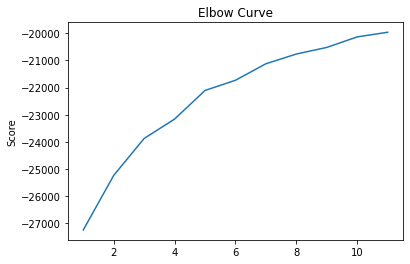

In [13]:
# elbow curve 그리기
cluster_range = range(1, 12) 
kmeans = [KMeans(n_clusters=i) for i in cluster_range]
score = [kmeans[i].fit(X_df_v1_scaled).score(X_df_v1_scaled) for i in range(len(kmeans))]

plt.plot(cluster_range, score)
plt.xlabel('')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### 4\. 새롭게 들어오는 데이터에 대해 아웃라이어 탐지하기

___

v1(train data)를 기준으로 적절한 클러스터 갯수까지 정하였습니다. 앞으로 새롭게 들어올 v4(test data) 데이터에 대해서 클러스터 중심으로 부터 떨어진 데이터 포인트에 대해서는 아웃라이어로 판단하겠습니다. 여기서 아웃라이어는 어떤 클러스터에도 속하지 못하는 점으로 보험사기라고 생각하시면 되겠습니다.

In [14]:
# v1 데이터에 대해 4개의 클러스터를 생성한 후, v4 데이터에 클러스터를 부여합니다. 
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_df_v1_scaled)
X_df_v4_clusters = kmeans.predict(X_df_v4_scaled)

# 생성된 클러스터의 중점을 확인합니다. 
X_df_v4_clusters_centers = kmeans.cluster_centers_
print(X_df_v4_clusters_centers[0]) #첫 번째 클러스터

[3.99380805e-01 5.38699690e-01 4.02476780e-02 3.09597523e-03
 1.85758514e-02 8.82352941e-01 1.17647059e-01 1.11455108e-01
 3.71517028e-01 2.44582043e-01 1.98142415e-01 6.50154799e-02
 8.14241486e-01 1.85758514e-01 9.84520124e-01 1.54798762e-02
 7.77089783e-01 9.90712074e-02 1.23839009e-01 5.78947368e-01
 4.21052632e-01 9.13312693e-01 8.66873065e-02 9.90712074e-02
 1.95046440e-01 5.88235294e-02 2.07430341e-01 2.53869969e-01
 1.85758514e-01 2.44582043e-01 2.01238390e-01 3.28173375e-01
 1.98142415e-01 2.78637771e-02 0.00000000e+00 2.07430341e-01
 2.35294118e-01 2.78637771e-02 6.19195046e-02 1.98142415e-01
 2.56965944e-01 0.00000000e+00 5.13931889e-01 3.52941176e-01
 8.35913313e-02 4.02476780e-02 9.28792570e-03 1.30104261e-18
 1.54798762e-02 1.77635684e-15 8.45201238e-01 1.36222910e-01
 3.09597523e-03 0.00000000e+00 0.00000000e+00 1.54798762e-02
 1.77635684e-15 9.84520124e-01 7.37874097e-01 1.80598555e-01
 4.56236799e-01]


4 번째 클러스터 중에 첫 번째 클러스터를 뽑아보았습니다. 61컬럼을 모델의 input으로 넣었기 때문에 첫 번째 클러스터의 61차원의 값이 반환이 되었습니다.

### 5\. 예측하기

___

x입력 데이터와 x입력 데이터가 속한 클러스터의 중점간의 거리를 기반으로 아웃라이어 여부를 판단하겠습니다.


In [15]:
# v4 데이터 포인트에 할당된 클러스터와 중점까지의 거리를 구합니다. 
dist = [np.linalg.norm(x-y) for x,y in zip(X_df_v4_scaled, X_df_v4_clusters_centers[X_df_v4_clusters])]

# 거리에 기반하여 fraud 여부를 할당합니다. 
is_fraud_pred = np.array(dist)
is_fraud_pred[dist>=np.percentile(dist, 90)] = 1 # 아웃라이더 사기다
is_fraud_pred[dist<np.percentile(dist, 90)] = 0

In [16]:
# 예측 결과 확인 
print( X_df_v4.shape ) 
print( is_fraud_pred.shape )

(3282, 61)
(3282,)


`np.percentile(dist,90)`이기 때문에 해당 클러스터의 중점으로부터 먼 곳에 위치한 데이터 포인트 상위 10%를 아웃라이어로 판단합니다. 그 외 하위 90%는 아웃라이더가 아니라고 예측한 결과를 확인 할 수 있습니다.

In [17]:
is_fraud_pred

array([0., 0., 0., ..., 0., 0., 0.])

### 6\. 평가하기

___

이상치에 대해서 예측을 잘 했는지 못 했는지 평가하기 위해서 f1 score를 사용합니다. 실제 정답이 True와 False로 나누어져있고 분류 모델 또한 True, False의 답을 줄수 있다면, 2x2 matrix로 case를 나누어 볼 수 있습니다. 아래 confusion matrix 이미지를 봐주세요!

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/confusion_matrix.max-800x600.png)

각 case별로 살펴보도록 하겠습니다.

-   True Positive(TP) : 실제 True인 정답을 True라고 예측했기 때문제 잘 맞춘 경우입니다.
-   False Positive(FP) : 실제 False인데 정답을 True라고 예측했으니, 오답인 경우이죠.
-   False Negative(FN) : 실제 True인데 정답을 False라고 예측했으니, 이것도 오답니다.
-   True Negative(TN) : 실제 False인 정답을 False라고 예측했으니 정답입니다.

classification\_report를 뽑아보게되면, 여러 지표들이 나오게 되는데요. precision과 recall 그리고 f1 score용어가 나오게 됩니다. 이 용어들에 대해 천천히 살펴보겠습니다.

1.  Precision (정밀도)  
    **정밀도**란 모델이 Ture라고 분류한 것 중에서 실제 True인 것의 비율입니다. 보험 사기라고 예측했는데, 실제로 보험 사기인지 살펴보는 지표라고 할 수 있습니다.

$$
(Precision)=\frac{TP}{TP+FP}
$$

2.  Recall (재현율)  
    **재현율**이란 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율입니다. 실제 보험사기 중에서 모델이 보험사기라고 예측한 비율을 나타낸 지표입니다.

$$
(Recall) = \frac{TP}{TP+FN}
$$

즉, Precision이나 Recall은 모두 실제 True인 정답을 모델이 True라고 예측한 경우에 관심이 있으나, 바라보는 관점만 다릅니다. Precision은 모델의 입장에서, Recall은 실제 정답의 입장에서 정답을 정답이라고 맞춘 경우입니다.

3.  Accuracy (정확도)  
    위 두 지표는 모두 True를 True라고 옳게 예측한 경우에 대해서만 다루었습니다. 하지만 Fasle를 False라고 예측한 경우도 옳은 경우입니다. 해당 경우를 고려하는 지표가 정확도입니다.
    
4.  F1 score  
    f1 score는 Precision과 recall의 조화평균입니다. 데이터 label이 불균형 구조일 때, 모델의 성능을 정확하게 평가할 수 있으며, 성능을 하나의 숫자로 표현할 수 있습니다.

In [18]:
y_pred = is_fraud_pred
y = Y_df_v4

이상치에 대한 f1 score가 0.18을 기록하여 다소 낮은 수치처럼 보이지만, 다른 task에 비해 높은 수치를 얻은 것을 확인할 수 있습니다. 다음 챕터에서의 f1 score와 비교해봅시다.

In [19]:
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))

# 이상치에 대한 f1-score : 0.18 을 기록하였습니다.

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3203
           1       0.11      0.47      0.18        79

    accuracy                           0.90      3282
   macro avg       0.55      0.69      0.56      3282
weighted avg       0.96      0.90      0.93      3282

[[2911  292]
 [  42   37]]


In [20]:
y.sum()

is_fraud    79
dtype: int64

그래서 confusion matrix에서 분류 결과가 1인 경우가 보험 사기이므로, 42과 37를 더한 79이 보험 사기일 것으로 예측이 됩니다.

## 10-4. Imbalanced data 다루기/ 지도학습으로 풀기

### 지도 학습 기반의 이상 탐지

___

본 컨텐츠에서는 지도 학습을 기반으로 이상치를 탐지해보도록 합니다. 보험 사기의 또 다른 특징 중 하나는 불균형문제입니다. 일반사고와 보험사고 중에 일반사고가 95% 이상 치우쳐있고 보험사기는 5%밖에 안 되는 특징이 있었죠. 이를 Imbalanced data라 부릅니다. 다시 말하면, 일반적으로 분류 문제에서 클래스들이 균일하게 분포하지 않은 문제들을 의미합니다. 그래서 데이터셋이 불균형할 때, 발생할 수 있는 문제점과 그 해결 방법을 알아보도록 합니다.

![content img](https://d3s0tskafalll9.cloudfront.net/media/original_images/imbalanced_data.jpg)

\[출처 : http://www.ccherald.kr/news/articleView.html?idxno=10725\]

그래서 Imbalanced data 변형시켜 전체 클래스의 분포를 균일하기 만드는 다양한 샘플링 방법들이 존재합니다.

1.  Over-sampling
2.  Under-sampling

크게 두 기법이 존재합니다. **Over sampling** 기법은 적은 레이블을 가진 데이터셋을 많은 레이블을 가진 데이터셋 수준으로 증식하여 학습에 충분한 데이터를 확보하는 기법입니다. **Under-sampling** 방법은 많은 레이블을 가진 데이터셋을 적은 레이블을 가진 데이터셋 수준으로 감소시키는 기법입니다. 이 기법을 사용하면 과도하게 많은 레이블을 가진 데이터로 학습하는 문제는 피할 수 있지만, 너무 많은 데이터를 감소시키기 때문에 많은 레이블을 가진 데이터는 오히려 제대로 된 학습을 수행할 수 없기도 합니다.

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/under_over.max-800x600.png)

\[출처 : https://joonable.tistory.com/27\]

이를 구현한 파이썬 패키지가 `imbalanced-learn`패키지입니다. 우리는 다양한 샘플링 방법 중 `RandomUnderSampler`를 사용해보겠습니다.

In [ ]:
!pip install imblearn

In [ ]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.semi_supervised import LabelSpreading
from sklearn.linear_model import LogisticRegression

### 1\. 데이터셋 준비

___

데이터셋 구성과 전처리는 이전 스텝과 동일합니다. `df_v1`은 train set이고, `df_v4`는 test set입니다.

In [ ]:
# 데이터셋을 준비합니다. v1 데이터로 학습, v4 데이터로 테스트를 수행합니다.  
df_v1 = pd.read_csv(os.getenv('HOME')+'/aiffel/insurance_fraud/data/dataset_1_labeled_train.csv') 
df_v4 = pd.read_csv(os.getenv('HOME')+'/aiffel/insurance_fraud/data/dataset_4_labeled_test.csv')

In [ ]:
df_v1

필요없는 전처리들은 삭제시켜주세요. 그리고 정답레이블인 `is_fraud`만 `labels`변수로 할당하겠습니다.

In [ ]:
# 전처리 - 피쳐 및 레이블  
features = df_v1.columns.drop(['month', 'is_fraud', 'dataset', 'accident_id', 'created_at_date'])
labels = ['is_fraud']

In [ ]:
# 데이터셋 확인 - v1 에는 22개의 의심 건
df_v1['is_fraud'].groupby(df_v1['is_fraud']).count()

In [ ]:
# 데이터셋 확인 - v4 에는 79개의 의심 건
df_v4['is_fraud'].groupby(df_v4['is_fraud']).count()

In [ ]:
# 불균형성 확인 
plt.hist(df_v1['is_fraud'])

위 막대그래프에서 확인했다시피, 데이터의 불균형성을 확인했습니다. `is_fraud`컬럼에서 사기가 아닌 값의 갯수는 4298이고 사기인 값의 갯수는 22로 심한 불균형형태를 띄고 있습니다.

데이터셋을 나누도록 하겠습니다. train data와 test data 모두 정답데이터를 따로 저장하겠습니다.

In [ ]:
# 데이터셋 준비 
X_df_v1 = df_v1[features]
Y_df_v1 = df_v1[labels]
 
X_df_v4 = df_v4[features]
Y_df_v4 = df_v4[labels]

### 2\. 1차학습 : 원본 데이터 그대로 이용하여 학습

___

샘플링을 수행하지 않고, 일반 LogisticRegression으로 원본 데이터인 불균형상태에서 학습해보겠습니다.

In [ ]:
# 샘플링을 수행하지 않고 불규형한 상태에서 학습해보겠습니다. 
clf1 = LogisticRegression(random_state=0).fit(X_df_v1, Y_df_v1.values.ravel())


# 결과 확인
y = Y_df_v4
y_pred = clf1.predict(X_df_v4)
plt.hist(y_pred)

# 보험사기로 예측한 건이 1건도 없음을 알 수 있습니다.

위 막대그래프를 살펴보니, 보험사기로 예측을 했다면, bar가 2개가 나와야되는데, 하나의 bar만 나온 것을 보니 일반사고만 예측하고 보험 사기로 예측한 건은 1건도 없음을 알 수 있습니다.

In [ ]:
# 평가 
print(classification_report(y, y_pred, zero_division=0))
ConfusionMatrixDisplay.from_estimator(clf1, X_df_v4, Y_df_v4)
plt.show()

f1-score로 예측을 잘했는지 지표로 나타내보았습니다. 이러면 Accuracy는 98% 일 수 있지만, 과연 의미가 있는 수치일 수 있을까요? 그렇지 못할 것입니다. 분류 값 1에 대한 precision, recall, f1-score점수가 모두 0인 것을 보니 보험 사기는 한 건도 탐지 못 했습니다. 데이터가 불균형할 때는 이러한 문제점이 발생함을 알 수 있습니다.

### 2차 학습 : 언더 샘플링하여 학습

___

이번에는 다양한 sampling기법 중에서 Random under sampling을 적용해 데이터의 불균형성을 맞추고, 학습을 수행해보도록 하겠습니다. Random under sampling 은 다수의 클래스에서 높은 비중을 차지하는 클래스의 값들을 임의로 제거하여 크기를 맞추는 방법입니다.

-   Random under sampling의 장점

traning set이 충분할 때, training set의 크기를 줄임으로써 실행 시간과 용량을 줄일 수 있습니다.

-   Random under sampling의 단점

classifier를 만들 때, 유용하게 사용될 수 있는 data가 유실될 수 있다는 점입니다. 또한 임의적으로 뽑은 sample이 편향되었을 수도 있고, 모집단을 대표하지 않을 수도 있습니다. 이로 인해 test set에서는 부정확한 결과가 초래할 수 있습니다. 그래서 임의로 제거했기 때문에 학습할 때마다 성능이 달라질 수 도 있습니다.

**랜덤 언더 샘플링**

In [ ]:
# 데이터셋 준비 
X_df_v1 = df_v1[features]
Y_df_v1 = df_v1[labels]
 
X_df_v4 = df_v4[features]
Y_df_v4 = df_v4[labels]

In [ ]:
# 샘플링을 수행합니다. 
rus = RandomUnderSampler(random_state=42)
X_df_v1_sampled, Y_df_v1_sampled = rus.fit_resample(X_df_v1, Y_df_v1)

RandomUnderSample를 수행해, 샘플링된 x데이터와 y데이터를 뽑아보았습니다.

In [ ]:
print(Y_df_v1)

샘플링 전 원본데이터의 정답레이블 출력을 확인해보았습니다.

In [ ]:
# 샘플링 전 
plt.hist(df_v1['is_fraud'])
df_v1['is_fraud'].value_counts()

샘플링 전에는 한쪽 데이터로 4320값으로 치우친 경향을 보이고 있네요.

In [ ]:
# 샘플링 후 
plt.hist(Y_df_v1_sampled)
print(Y_df_v1_sampled.shape)
Y_df_v1_sampled['is_fraud'].value_counts()

Under-sampling을 했기 때문에, 샘플링 후에는 데이터갯수가 4320에서 44개로 줄어들었고 데이터 갯수가 작은 레이블로 비율이 맞춰졌음을 확인할 수 있습니다.

### 학습 및 결과

In [ ]:
clf2 = LogisticRegression(random_state=0).fit(X_df_v1_sampled, Y_df_v1_sampled.values.ravel())

# 결과 확인
y = Y_df_v4
y_pred = clf2.predict(X_df_v4)
plt.hist(y_pred)

# 테스트셋 X_df_v4 에 대해 레이블이 비슷하게 예측함으로 확인할 수 있습니다.

In [ ]:
# 평가 
print(classification_report(y, y_pred))
ConfusionMatrixDisplay.from_estimator(clf2, X_df_v4, Y_df_v4)  
plt.show()

이러한 경우 Accuracy는 98% -> 56% 로 하락했지만 보험사기건에 대해서 precision 0.03, recall 0.48을 기록하였습니다. 현실에선 훨씬 의미있는 수치라고 할 수 있습니다.

## 10-5. Semi supervised 학습 기반의 이상 탐지

앞서서는 학습 데이터 레이블이 존재하지 않는 비지도 학습과 레이블이 존재하는 지도 학습 방법론을 체험해보았습니다. 이번 시간에는 준 지도 학습(Semi supervised learning)학습 기반으로 이상탐지를 수행해보겠습니다.

### 준 지도 학습 (Semi-supervised learning)이란?

준 지도 학습(Semi-supervised learning)은 레이블링이 된 데이터가 충분하지 않을 때, 레이블이 없는 데이터를 이용하여 학습하는 모델입니다. 즉, 레이블이 없는 데이터를 이용하여 지도 학습의 성능을 끌어올립니다. 따라서 준 지도 학습은 적은 양의 Labeled data와 많은 양의 Unlabeled data가 서로 식별 가능한 관계가 있다고 가정하고 이를 찾아내어 모델의 성능을 향상시킬 수 있는 알고리즘 방법론을 찾는 것을 목표로 합니다.

현실에서 준 지도 학습이 유용한 이유는 `모든 데이터셋에 엄밀하게 레이블이 부여되어 있지 않은 경우`가 많으며, `레이블링에는 비용`이 들기 때문입니다

### 참고자료

-   [Semi-supervised learning 방법론 소개](https://sanghyu.tistory.com/177)
-   [sklearn.semi\_supervised.LabelSpreading](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html?highlight=labelspreading)
-   [Label Propagation learning a complex structure](https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_structure.html#sphx-glr-auto-examples-semi-supervised-plot-label-propagation-structure-py)

### 튜토리얼 1. sklearn.semi\_supervised.LabelSpreading

___

sklearn 에서는 semi-supervised learning 을 위한 label spreading 모델을 제공합니다.

일부 다른 실제 레이블과 다른 레이블도 있지만 전체적으로 유사하게 예측 된 것을 확인할 수 있습니다.

In [ ]:
# 필요한 패키지를 로드합니다 
import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading

LabelSpreading은 semi-supervised learning 방법 중 하나입니다. 자세한 내용은 아래 자료를 참고하세요. 하지만 자세히 들여다 볼 필요는 없습니다.    


- [Learning with Local and Global Consistency](http://citeseer.ist.psu.edu/viewdoc/summary?doi=10.1.1.115.3219)
- [Semi-Supervised Learning With Label Spreading](https://machinelearningmastery.com/semi-supervised-learning-with-label-spreading/)

In [ ]:
# 모델과 데이터셋을 선언합니다. label spreading 에는 k=2 인 knn모델을 활용해보겠습니다. 
label_prop_model = LabelSpreading(kernel='knn', n_neighbors=2) 
iris = datasets.load_iris()

In [ ]:
iris.data

In [ ]:
# 레이블 
iris.target

In [ ]:
# 레이블 중에서 unlabeled 시킬 30%의 데이터 포인트를 선정합니다. 
unlabeled_index = np.random.RandomState(0).rand(len(iris.target)) < 0.3
unlabeled_index

In [ ]:
# unlabeled point 의 레이블은 -1로 설정합니다 
unlabeled_target = np.copy(iris.target)
unlabeled_target[unlabeled_index] = -1

In [ ]:
# 잘 unlabeled 되었음을 확인하실 수 있습니다. 
unlabeled_target

In [ ]:
# label spreading model 을 학습시킵니다. 
label_prop_model.fit(iris.data, unlabeled_target)

In [ ]:
# 예측 레이블 
label_prop_model.predict(iris.data)

In [ ]:
# 실제 레이블 
iris.target

### 튜토리얼 2. 시각화

___

이번에는 직접 시각화를 수행해보도록 하겠습니다.

In [ ]:
import sklearn; sklearn.show_versions()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.semi_supervised import LabelSpreading

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target
y_rand = np.random.RandomState(0).rand(y.shape[0])

# 레이블 중에서 unlabeled 시킬 데이터 포인트를 선정합니다. 
y_20 = np.copy(y)
y_20[y_rand < 0.2] = -1
y_50 = np.copy(y)
y_50[y_rand < 0.5] = -1
y_70 = np.copy(y)
y_70[y_rand < 0.7] = -1

n = 4
ls20 = (LabelSpreading(kernel='knn', n_neighbors=n).fit(X, y_20), y_20, '80% labeled data ')
ls50 = (LabelSpreading(kernel='knn', n_neighbors=n).fit(X, y_50), y_50, '50% labeled data ')
ls70 = (LabelSpreading(kernel='knn', n_neighbors=n).fit(X, y_70), y_70, '30% labeled data ')

x\_min, x\_max는 훈련 데이터 x의 첫 번째 값인 꽃잎 길이의 최소값 -1, 최대값 + 1입니다. y\_min, y\_max도 마찬가지로 훈련 데이터 x의 두 번째 값인 꽃잎 너비의 최소값-1, 최대값 +1입니다. `np.meshgrid()`는 격자의 교차점 좌표를 편리하게 다룰 수 있도록 값을 리턴하는 함수입니다. `ravel()`를 이용해 1차원 배열을 한 줄로 쭉 만든 후 전치 행렬로 변환하여 퍼셉트론 분류기의 predict()의 인자로 입력하여 계산된 예측 값을 Z로 두고, Z를 `reshape()`을 이용해 원래 배열 모양으로 복원합니다. `contourf()`는 xx, yy가 축인 그래프 상에 cmap를 이용해 등고선을 그립니다.


In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}
plt.figure(figsize=(20,8))

classifiers = (ls20,  ls50, ls70)
for i, (clf, y_train, title) in enumerate(classifiers):
    
    plt.subplot(1,3, i+1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # 예측 결과를 그래프 상에 표현합니다. 
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')


    # 학습 포인트들도 그래프에 표현합니다. 
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

    plt.title(title)

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

### 결과

___

-   위 그림은 각각 80%, 50%, 30%만의 labled 데이터를 가지고, label spreading 했을 때 흰색의 unlabeled 데이터 포인트가 어떤 레이블을 할당 받는지 표현한 그림입니다.
-   그래프를 보면, 3개의 레이블의 경계가 세개 다 유사하게 형성된 것으로 보아, 실제로 30%의 레이블된 소량의 데이터만 레이블링 된 상황이였지만, label spreading 을 통해 80%의 labeled 데이터가 있는 것과 유사한 효과를 낼 수 있음을 확인할 수 있습니다.
-   다음은 프로젝트로 레이블이 부족한 쏘카 보험사기 데이터에 준 지도 학습을 적용해보겠습니다.

## 10-6. 쏘카데이터에 semi supervised 적용하기

이전 스텝에서 iris데이터로 semi supervised data를 사용했다면, 이번 스텝에서는 레이블이 부족한 쏘카 데이터에 semi supervised를 적용하는 것입니다. 프로젝트에 적용할 베이스라인 코드를 작성하고, 다음 스텝 프로젝트에 응용 해봅시다.

In [ ]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import classification_report
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
# 데이터셋을 준비합니다.
df = pd.read_csv(os.getenv('HOME')+'/aiffel/insurance_fraud/data/final_v2.csv')

In [ ]:
df

In [ ]:
df.isnull().sum()

In [ ]:
#활용할 피쳐와 레이블 
features = df.columns.drop([ 'test/train/unlabeled', 'isfraud'])
label = ['isfraud'] 

print('features', features)
print('label', label)

In [ ]:
plt.hist(df['isfraud'])

레이블 확인였고, -1은 레이블이 없는 데이터, 0은 일반사고, 1은 보험사기 사고를 의미합니다. 상당수는 레이블이 없는 데이터임을 확인할 수 있습니다.


### 성능 비교를 위한 베이스라인 모델

레이블 된 데이터만을 이용해 지도학습 모델을 생성합니다.

In [ ]:
# 트레인 셋 / 테스트 셋 
X_train_labeled = df[df['test/train/unlabeled']==2][features]
Y_train_labeled = df[df['test/train/unlabeled']==2][label]

X_test_labeled = df[df['test/train/unlabeled']==1][features]
Y_test_labeled = df[df['test/train/unlabeled']==1][label]

In [ ]:
clf1 = LogisticRegression(random_state=0).fit(X_train_labeled, Y_train_labeled.values.ravel())

# 결과 확인
y = Y_test_labeled
y_pred = clf1.predict(X_test_labeled)

In [ ]:
# 평가 
print(classification_report(y, y_pred))
ConfusionMatrixDisplay.from_estimator(clf1, X_test_labeled, Y_test_labeled)  
plt.show()  

# 보험사기건에 대한 f1-score 0.44를 기록했습니다.

## 프로젝트

___

프로젝트를 위해 주요 라이브러리 버전을 확인해 봅시다.

In [ ]:
import pandas
import sklearn
import imblearn

print(pandas.__version__)
print(sklearn.__version__)
print(imblearn.__version__)

프로젝트는 이렇게 진행해 주세요.

1.  앞서 배운 sklearn.semi\_supervised.LabelSpreading 을 활용해서 unlabeled 데이터에 label을 할당합니다.
    
    -   knn 모델을 활용하며, k는 각각 1, 3, 5로 실험을 진행
2.  또한 unlabeled 데이터는 전체 데이터를 활용하지 않고, 일부만을 활용해 봅시다.
    
    -   10%, 30%, 50%를 샘플링해서 실험